<a href="https://colab.research.google.com/github/Neermita18/Kaggle_challenges/blob/main/Chest_Xray_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-xray:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5186538%2F8657347%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240611%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240611T134313Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D79a7d32983368ee3dea9dd5424d4cfce8a17f8d4178987fae3230012bf461b14c3da561bba9be83d146e97d3327e1eb9e697711dca1b4c2ee4fea2901a97dbf2c878bc5f6dd93278473eed8034d9bfc4c7c9ec9a2feb12d48171964929c4b9a164f15ddf723654736a21285991888dc00ee190d0b0bdd699d1f0091c1e87c659a1b4848957254e93acbed62603577894b9c900fd4bb687653d89f0d2e2cf8831b4b2d81db2a08ac1f6afecf2f781694713b9f791a1fc67257cbfcc187aa846294f26427caf106b89b6f62a86e3d8bc09142570b4e62e1ba5e3109c065acd9f925576c96229d15a165b3fe06e9fb9346a01ea45f37d148db752e7b2efa83341ad'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2451909674 bytes downloaded
Downloaded and uncompressed: chest-xray
Data source import complete.


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image



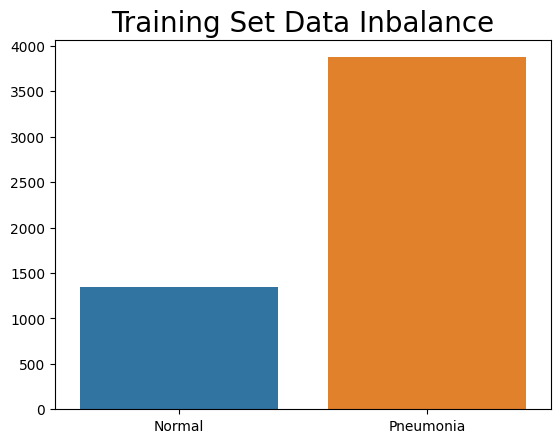

In [ ]:
path = '../input/chest-xray/chest_xray/chest_xray'

train_samplesize = pd.DataFrame.from_dict(
    {'Normal': [len([os.path.join(path+'/train/NORMAL', filename)
                     for filename in os.listdir(path+'/train/NORMAL')])],
     'Pneumonia': [len([os.path.join(path+'/train/PNEUMONIA', filename)
                        for filename in os.listdir(path+'/train/PNEUMONIA')])]})


sns.barplot(data=train_samplesize).set_title('Training Set Data Inbalance', fontsize=20)
plt.show()

In [ ]:
test_d = '../input/chest-xray/chest_xray/chest_xray/test'
train_d= '../input/chest-xray/chest_xray/chest_xray/train'
val_d=os.path.join(path,'val') #another way

(1418, 1020)


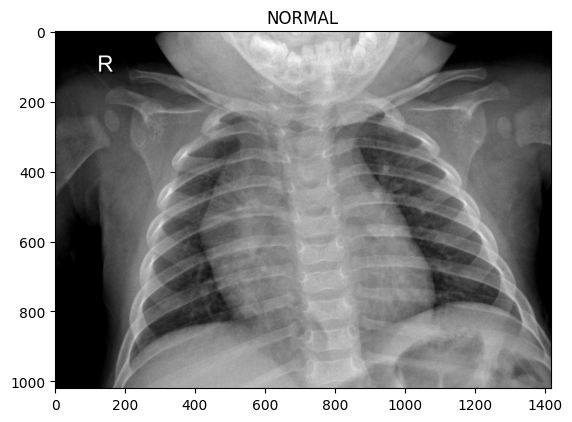

(1088, 584)


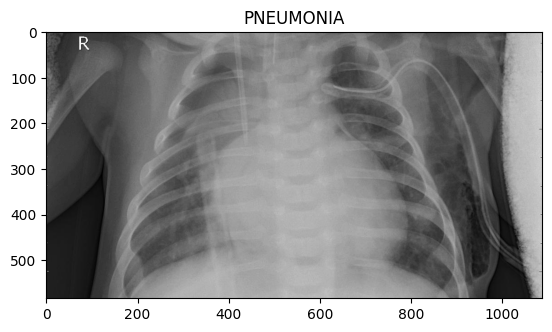

In [ ]:
categ = ['NORMAL', 'PNEUMONIA']
for ca in categ:
    path = os.path.join(train_d,ca)
    for img in os.listdir(path):
        img_arr =Image.open(os.path.join(path,img))
        print(img_arr.size)

        plt.imshow(np.array(img_arr),cmap='gray')
        plt.title(ca)
        plt.show()
        break

In [ ]:
# image_pathes=[]
# labels=[]

# files=os.listdir(train_d)
# for file in files:
#     file_path=os.path.join(train_d,file)
#     images=os.listdir(file_path)
#     for image in images:
#         image_path=os.path.join(file_path,image)
#         image_pathes.append(image_path)
#         labels.append(file)

# print(image_pathes)
# print(labels)

images=[]
classes=[]
categ = ['NORMAL', 'PNEUMONIA']
for ca in categ:
    path = os.path.join(train_d,ca)
    for img in os.listdir(path):
        image_path= os.path.join(path, img)
        images.append(image_path)
        classes.append(ca)

print(images)
print(classes)




['../input/chest-xray/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0662-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1171-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0909-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/IM-0273-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1112-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0475-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0895-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0659-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/IM-0363-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/IM-0359-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-1423-0001.jpeg', '../input/chest-xray/chest_xray/chest_xray/train/NORMAL/IM-0265-0001.jpeg', '../input/chest-xray/ch

In [ ]:
imageseries=pd.Series(images, name="images")
classseries=pd.Series(classes,name="classes")
train_df=pd.concat([imageseries,classseries],axis=1)

In [ ]:
train_df

,images,classes
0,../input/chest-xray/chest_xray/chest_xray/trai...,NORMAL
1,../input/chest-xray/chest_xray/chest_xray/trai...,NORMAL
2,../input/chest-xray/chest_xray/chest_xray/trai...,NORMAL
3,../input/chest-xray/chest_xray/chest_xray/trai...,NORMAL
4,../input/chest-xray/chest_xray/chest_xray/trai...,NORMAL
...,...,...
5211,../input/chest-xray/chest_xray/chest_xray/trai...,PNEUMONIA
5212,../input/chest-xray/chest_xray/chest_xray/trai...,PNEUMONIA
5213,../input/chest-xray/chest_xray/chest_xray/trai...,PNEUMONIA
5214,../input/chest-xray/chest_xray/chest_xray/trai...,PNEUMONIA


In [ ]:
train_df['images']

0       ../input/chest-xray/chest_xray/chest_xray/trai...
1       ../input/chest-xray/chest_xray/chest_xray/trai...
2       ../input/chest-xray/chest_xray/chest_xray/trai...
3       ../input/chest-xray/chest_xray/chest_xray/trai...
4       ../input/chest-xray/chest_xray/chest_xray/trai...
                              ...                        
5211    ../input/chest-xray/chest_xray/chest_xray/trai...
5212    ../input/chest-xray/chest_xray/chest_xray/trai...
5213    ../input/chest-xray/chest_xray/chest_xray/trai...
5214    ../input/chest-xray/chest_xray/chest_xray/trai...
5215    ../input/chest-xray/chest_xray/chest_xray/trai...
Name: images, Length: 5216, dtype: object

In [ ]:
images=[]
classes=[]
categ = ['NORMAL', 'PNEUMONIA']
for ca in categ:
    path = os.path.join(test_d,ca)
    for img in os.listdir(path):
        image_path= os.path.join(path, img)
        images.append(image_path)
        classes.append(ca)

In [ ]:
imageseries=pd.Series(images, name="images")
classseries=pd.Series(classes,name="classes")
test_df=pd.concat([imageseries,classseries],axis=1)

In [ ]:
test_df

,images,classes
0,../input/chest-xray/chest_xray/chest_xray/test...,NORMAL
1,../input/chest-xray/chest_xray/chest_xray/test...,NORMAL
2,../input/chest-xray/chest_xray/chest_xray/test...,NORMAL
3,../input/chest-xray/chest_xray/chest_xray/test...,NORMAL
4,../input/chest-xray/chest_xray/chest_xray/test...,NORMAL
...,...,...
619,../input/chest-xray/chest_xray/chest_xray/test...,PNEUMONIA
620,../input/chest-xray/chest_xray/chest_xray/test...,PNEUMONIA
621,../input/chest-xray/chest_xray/chest_xray/test...,PNEUMONIA
622,../input/chest-xray/chest_xray/chest_xray/test...,PNEUMONIA


In [ ]:
test_df['images']

0      ../input/chest-xray/chest_xray/chest_xray/test...
1      ../input/chest-xray/chest_xray/chest_xray/test...
2      ../input/chest-xray/chest_xray/chest_xray/test...
3      ../input/chest-xray/chest_xray/chest_xray/test...
4      ../input/chest-xray/chest_xray/chest_xray/test...
                             ...                        
619    ../input/chest-xray/chest_xray/chest_xray/test...
620    ../input/chest-xray/chest_xray/chest_xray/test...
621    ../input/chest-xray/chest_xray/chest_xray/test...
622    ../input/chest-xray/chest_xray/chest_xray/test...
623    ../input/chest-xray/chest_xray/chest_xray/test...
Name: images, Length: 624, dtype: object

In [ ]:
images=[]
classes=[]
categ = ['NORMAL', 'PNEUMONIA']
for ca in categ:
    path = os.path.join(val_d,ca)
    for img in os.listdir(path):
        image_path= os.path.join(path, img)
        images.append(image_path)
        classes.append(ca)

In [ ]:
imageseries=pd.Series(images, name="images")
classseries=pd.Series(classes,name="classes")
val_df=pd.concat([imageseries,classseries],axis=1)

In [ ]:
val_df

,images,classes
0,../input/chest-xray/chest_xray/chest_xray/val/...,NORMAL
1,../input/chest-xray/chest_xray/chest_xray/val/...,NORMAL
2,../input/chest-xray/chest_xray/chest_xray/val/...,NORMAL
3,../input/chest-xray/chest_xray/chest_xray/val/...,NORMAL
4,../input/chest-xray/chest_xray/chest_xray/val/...,NORMAL
5,../input/chest-xray/chest_xray/chest_xray/val/...,NORMAL
6,../input/chest-xray/chest_xray/chest_xray/val/...,NORMAL
7,../input/chest-xray/chest_xray/chest_xray/val/...,NORMAL
8,../input/chest-xray/chest_xray/chest_xray/val/...,PNEUMONIA
9,../input/chest-xray/chest_xray/chest_xray/val/...,PNEUMONIA


In [ ]:
val_df['images']

0     ../input/chest-xray/chest_xray/chest_xray/val/...
1     ../input/chest-xray/chest_xray/chest_xray/val/...
2     ../input/chest-xray/chest_xray/chest_xray/val/...
3     ../input/chest-xray/chest_xray/chest_xray/val/...
4     ../input/chest-xray/chest_xray/chest_xray/val/...
5     ../input/chest-xray/chest_xray/chest_xray/val/...
6     ../input/chest-xray/chest_xray/chest_xray/val/...
7     ../input/chest-xray/chest_xray/chest_xray/val/...
8     ../input/chest-xray/chest_xray/chest_xray/val/...
9     ../input/chest-xray/chest_xray/chest_xray/val/...
10    ../input/chest-xray/chest_xray/chest_xray/val/...
11    ../input/chest-xray/chest_xray/chest_xray/val/...
12    ../input/chest-xray/chest_xray/chest_xray/val/...
13    ../input/chest-xray/chest_xray/chest_xray/val/...
14    ../input/chest-xray/chest_xray/chest_xray/val/...
15    ../input/chest-xray/chest_xray/chest_xray/val/...
Name: images, dtype: object